## Logistic Regression

In [4]:
# Import libraries
import numpy as np
import pandas as pd
import warnings

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Set display options
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
pd.options.display.max_colwidth = -1

In [6]:
# Print multiple items in one command and ignore warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

# Create side by side display function
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

Whereas (Multiple) Linear Regression is for solving regression problems, Logistic Regression is for classification problems. <br>However, regression is used inside the formula to finally convert continuous numbers to odds (from 0 to 1).

Logistic Regression is more specifically designed to classify binary target variables. Using for example a one-vs-all approach, Logistic Regression can be used for multi-class classification problems. In this method, multiple regression lines are fitted to seperate target groups. The probabilities for each class are then calculated by using all models individually. Basically just using binary classification multiple times.

<img src="images/Logistic_regression/binary_vs_all.PNG" alt="binary vs all" style="width: 700px;"/>

Logistic regression uses the Sigmoid function under the hood to turn any continuous outcome to a number between 0 and 1. This is our probability and using a threshold we can turn our probabilities in binary outcomes.
<img src="images/Logistic_regression/sigmoid_function.PNG" alt="sigmoid function" style="width: 500px;"/>

Euler's number is convenient since the derivative of e^X is still the same.

We use the formula similar to regression (above denoted as X) and plug it into the Sigmoid function. If we set our classification threshold at 0.5, and our output is positive on the x-scale, we classify it as label 1. If the output is negative we classify it as 0. <br> So note that the vector of Beta's transposed with the x inputs is the input in the sigmoid function (basically the output of the regression formula, what for linear regression would be y hat). 
<img src="images/Logistic_regression/input_sigmoid.PNG" alt="input sigmoid" style="width: 250px;"/>

When z = 0, e^-0 = 1 and the function becomes 1/2. Therefore zero is the turning point in the sigmoid function. <br> 
Any negative input from the regression formula will be turned positive inside the exponential function, and will result in a large number. Logically, 1 devided by a large positive number results in a very small number. <br> 
The other way around, a positive regression output is turned negative. The exponential of a negative number becomes a very small number. 1 devided by 1 and a bit (that very small number), becomes something very close to 1.

In [7]:
# Define the sigmoid function
def sigmoid_f(x):
    return 1 / (1 + np.exp(-x))

In [8]:
# Create some testdata to show the working of the sigmoid function
data = pd.DataFrame({'x': np.arange(start = -10, stop = 10.1, step = 0.1)})
data.x = round(data.x,1)
data['y'] = sigmoid_f(data['x'])

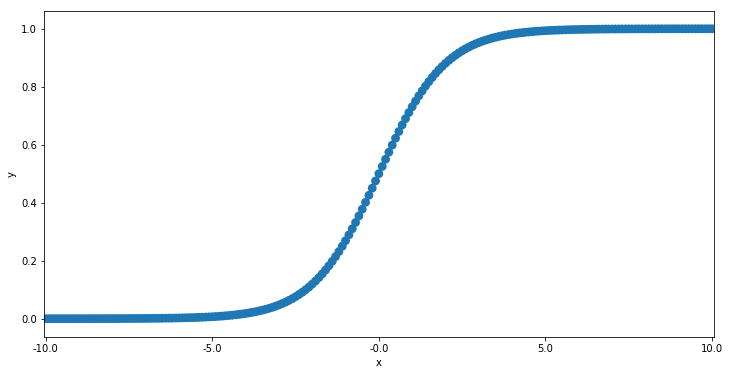

In [9]:
# Plot the resulting graph of applying the sigmoid function on x
f, axes = plt.subplots(figsize=(12, 6))
sigplot = sns.pointplot(x='x', y='y', data=data)
_ = sigplot.set_xticklabels(axes.get_xticklabels()[::50]);
_ = axes.set_xticks(axes.get_xticks()[::50])

So above, we used x in the sigmoid function. Normally x would be the outcome of the regression formula. I.e. the sum of the beta's multiplied with their respective input variables or B.T dotted with X.

The idea behind Logistic Regression is that you can create an n-1 dimentional plane/line that seperates the data in classes. Therefore, the model works best if features are used in which the variables have similar values within the group but differing values among groups.
<img src="images/Logistic_regression/n_dimentional_plane.PNG" alt="n-dimentional plane" style="width: 350px;"/>

To give an example, say we have a classification problem with two input variables. The regression formula will look as follows:
<img src="images/Logistic_regression/regression_formula.PNG" alt="regression formula" style="width: 350px;"/>

Now, looking at example data, we can say that B0 (or theta 0) is probably -3 since if the sum of x1 and x2 is equal to or smaller then 3, it would be classified as blue and red otherwise.
<img src="images/Logistic_regression/example_data.PNG" alt="example data" style="width: 300px;"/>

In order to create a convex function (so that we can use gradient descent), the cost function persists of two formulas. One for when y = 1 and one for y = 0. This is for y in the training set.
<img src="images/Logistic_regression/2way_cost_function.PNG" alt="2-way cost function" style="width: 600px;"/>

Of course it makes sence that for different classes the predictions vs actuals are evaluated in a different way, i.e. in the opposite way. When y=0 and the prediction is right, the error is 0. However, when the probability in the predictions goes towards 1, the error increases exponentially. Vice versa for when y = 1.
<img src="images/Logistic_regression/probability_curves.PNG" alt="probability curves" style="width: 500px;"/>

So, putting that together, it looks like this:
<img src="images/Logistic_regression/curves_one_graph.PNG" alt="curves one graph" style="width: 300px;"/>

The split in functions can however be squashed together using a trick. 
<img src="images/Logistic_regression/1way_log_function.PNG" alt="1-way log function" style="width: 500px;"/>

If y = 0, everything in front of the '+'-sign is zero, and the second part becomes log(1-Htheta(x)) <br>
if y=1, the first part becomes log(1-Htheta(x)) and the second part becomes zero. <br>
This makes it a lot easier to optimize.
Note that the minus sign is pulled out in front of the equation and we now take the average cost to perform the optimization on.
<img src="images/Logistic_regression/extended_log_function.PNG" alt="extended log function" style="width: 600px;"/>

In [10]:
# Compute the cost function 
def cost_function(theta, X, y):
    m = X.shape[0]
    return -(1/m) * np.sum(y * np.log(sigmoid_f(np.dot(X, theta))) + (1-y) * np.log(1 - sigmoid_f(np.dot(X, theta))))

We use Gradient Descent to gradually go from a starting position to an optimal combination of beta's resulting in the lowest error. We do so by iteratively predicting the target for each observation in the dataset, check the error and update the beta's by a specific learning rate based on the partial derivatives. The partial derivatives is basically determining the slope of the error term, to which direction should the beta move and how steep is the curve. A steep curve means that a large step can be taken as current estimate is far from optimal, a derivative of close to zero means it is close to optimal and a very small change in the beta would be the best next guess.
<img src="images/Logistic_regression/loss_curve.PNG" alt="loss curve" style="width: 500px;"/>

Going over all observations x times is determined by the number of epochs.

<img src="images/Logistic_regression/gradient_descent.PNG" alt="gradient descent" style="width: 500px;"/>

In which alpha is the learning rate, determining how big the steps should be in upgrading the beta's.

The partial derivatives can be calculated as follows:
<img src="images/Logistic_regression/partial_derivatives.PNG" alt="partial derivatives" style="width: 300px;"/>

Basically, we calculate the error multiplied with each observations input variable j, and take the average. <br>
1/ nr of observations, multiplied with the sum is the same as taking the average. <br>
h(x) is the prediction, i.e. the sigmoid function over the regression equation using the beta's from our current epoch multiplied with the x's from the observations. <br>
y are the actuals and xj is used in the partial derivative to measure whether high error's are correlated with high values for xj. If the average error multiplied with the x-values is negative, our beta for xj is too low. If the average error multiplied with the x-values is positive, we should lower the beta for that variable. <br>
Simultaniously updating the beta's after each epoch helps to navigate through the interdependencies, thereby using the formula as follows: 
<img src="images/Logistic_regression/error_calculation.PNG" alt="error calculation" style="width: 250px;"/>

In [11]:
# Compute the gradient of the cost function at the point theta
def gradient(theta, X, y):
    m = X.shape[0]
    return (1 / m) * np.dot(X.T, sigmoid_f(np.dot(X, theta)) - y)

Now that we know the gradients, we know the direction and have an idea of the stepsize to take in changing the beta's. So we can use a learning rate to not overstep and gradually improve the error. We take the current beta and subtract the average error multiplied with a that learning rate.
<img src="images/Logistic_regression/stepsize.PNG" alt="stepsize" style="width: 250px;"/>

All at once, this looks as follows:    
<img src="images/Logistic_regression/stepsize_vectors.PNG" alt="stepsize vectors" style="width: 250px;"/>

After applying linear regression inside the sigmoid function as a whole optimized by the log function using gradient descent, the best fitted S-curve has an optimal distinctive line between groups.

<img src="images/Logistic_regression/S_curve.PNG" alt="S-curve" style="width: 1000px;"/>

### Example with code

In [12]:
# As example we use the school admission dataset with 2 predictors and a binary target
data = pd.read_csv('datasets/school_admission.csv', sep=';', decimal=',')

In [13]:
data.head()

,Grade1,Grade2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


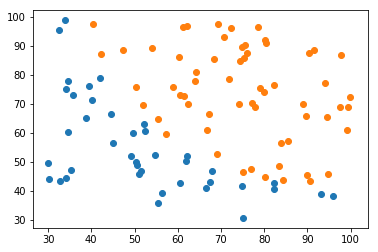

In [14]:
# Lets see if there is a clear distinction between groups on the predictors axes
_ = plt.scatter(data['Grade1'][data['Admitted'] == 0], data['Grade2'][data['Admitted'] == 0])
_ = plt.scatter(data['Grade1'][data['Admitted'] == 1], data['Grade2'][data['Admitted'] == 1])

In [15]:
# Split the train and testdata
X = data[['Grade1', 'Grade2']]
y = data['Admitted']

In [16]:
# preformed the vectors
X = np.c_[np.ones((X.shape[0], 1)), X]  # Add intercept term
y = y[:, np.newaxis]  # Transform to array
theta = np.zeros((X.shape[1], 1))  # Create vector of beta's, all starting at 0

In [17]:
# Set parameters
learning_rate = 0.001
num_iter = 1000000

In [18]:
# implement the loop of gradient descent
for epoch in range(num_iter):
    loss = cost_function(theta, X, y)
    grad = gradient(theta, X, y)
    theta = theta - learning_rate * grad
    
    if epoch % 100000 == 0:
        print("The loss for epoch {} is {}".format(epoch, round(loss,3)))

The loss for epoch 0 is 0.693
The loss for epoch 100000 is 0.387
The loss for epoch 200000 is 0.317
The loss for epoch 300000 is 0.284
The loss for epoch 400000 is 0.265
The loss for epoch 500000 is 0.252
The loss for epoch 600000 is 0.243
The loss for epoch 700000 is 0.237
The loss for epoch 800000 is 0.232
The loss for epoch 900000 is 0.228


In [19]:
# Now let's see the coefficients
theta

array([[-15.39517866],
       [  0.12825989],
       [  0.12247929]])

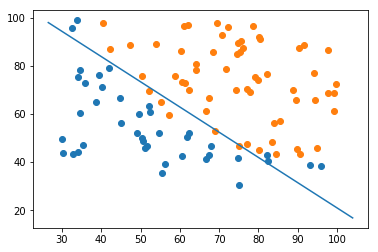

In [20]:
# Now using the theta array, we can define the seperation line
_ = plt.scatter(data['Grade1'][data['Admitted'] == 0], data['Grade2'][data['Admitted'] == 0])
_ = plt.scatter(data['Grade1'][data['Admitted'] == 1], data['Grade2'][data['Admitted'] == 1])
ax = plt.gca()
xvals = np.array(ax.get_xlim()).reshape(-1, 1) # Get the upper and lower bound for the x axes
yvals = -(xvals * theta[1] + theta[0]) / theta[2]
_ = plt.plot(xvals, yvals)

In [21]:
print("Probability of passing with scores {} and {}: {}".format(40, 50, round(sigmoid_f(40*theta[1] + 50*theta[2] + theta[0])[0],4)))
print("Probability of passing with scores {} and {}: {}".format(90, 80, round(sigmoid_f(90*theta[1] + 80*theta[2] + theta[0])[0],4)))
print("Probability of passing with scores {} and {}: {}".format(62, 61, round(sigmoid_f(62*theta[1] + 61*theta[2] + theta[0])[0],4)))

Probability of passing with scores 40 and 50: 0.0157
Probability of passing with scores 90 and 80: 0.9974
Probability of passing with scores 62 and 61: 0.507


In [22]:
# Check with sci-kit learn
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=1e20)
clf.fit(X[:, 1:3], y)

LogisticRegression(C=1e+20, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
# Create small dataset on score used as in our above fitted regression line
pred_df = pd.DataFrame({'Grade1': [40, 90, 62], 
                        'Grade2': [50, 80, 61]})

In [24]:
# Show the probabilities 
clf.predict_proba(pred_df)[:,1]

array([0.00113279, 0.99992067, 0.47925037])

They are about the same as the predictions that we got from our own fitted logistic regression.

Find some of the resources used below:

In [200]:
#https://blog.goodaudience.com/logistic-regression-from-scratch-in-numpy-5841c09e425f
#https://medium.com/@martinpella/logistic-regression-from-scratch-in-python-124c5636b8ac
#https://www.youtube.com/watch?v=-la3q9d7AKQ&list=PLNeKWBMsAzboR8vvhnlanxCNr2V7ITuxy
#https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions